In [2]:
from pymongo import MongoClient
client = MongoClient()
db = client.VA_jobs
coll = db.job_postings

In [194]:
titles = []
descriptions = []
requirements = []
for doc in coll.find():
    titles.append(doc['title'])
    descriptions.append(doc['description'])
    

In [195]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
snowball = SnowballStemmer('english')
porter = PorterStemmer()

stemmed_docs = []
for line in descriptions:
    stemmed_docs.append(' '.join([snowball.stem(word) for word in line.split('Job Description:\n')[1].split() ]) )
#     stemmed_docs.append(' '.join([porter.stem(word) for word in line.split('Job Description:\n')[1].split() ]) )


In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
t = TfidfVectorizer(stop_words = 'english', max_features=1000)
word_mat = t.fit_transform(stemmed_docs)

In [197]:
import numpy as np
%pylab inline
U, Sigma, VT = np.linalg.svd(word_mat.toarray(), full_matrices=False)

Populating the interactive namespace from numpy and matplotlib


In [185]:
print U.shape
print Sigma.shape
print VT.shape

(2170, 1000)
(1000,)
(1000, 1000)


In [146]:
var_explained = np.square(Sigma).cumsum() / (np.square(Sigma).sum())

(0, 80)

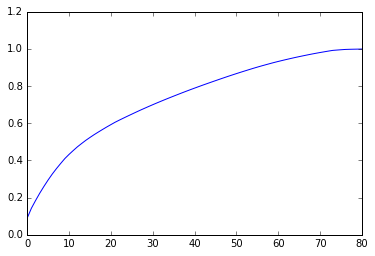

In [147]:
plt.plot(var_explained)
plt.xlim(0,80)

In [108]:
Sigma

array([  7.35664561e+00,   6.04708763e+00,   5.08635436e+00,
         4.85264820e+00,   4.52505000e+00,   4.39448747e+00,
         4.12811240e+00,   4.03332236e+00,   3.93635285e+00,
         3.85445908e+00,   3.83014520e+00,   3.60214716e+00,
         3.48495962e+00,   3.36516815e+00,   3.22593040e+00,
         3.11969073e+00,   2.97183768e+00,   2.85121514e+00,
         2.80439890e+00,   2.77785952e+00,   2.73861103e+00,
         2.72972307e+00,   2.69214559e+00,   2.62091589e+00,
         2.57911590e+00,   2.55568927e+00,   2.54718716e+00,
         2.47562052e+00,   2.46614023e+00,   2.41423172e+00,
         2.40933868e+00,   2.36910552e+00,   2.36684916e+00,
         2.34812388e+00,   2.31040302e+00,   2.28775098e+00,
         2.24399705e+00,   2.15817974e+00,   2.13408705e+00,
         2.07019104e+00,   2.05103077e+00,   2.02686285e+00,
         2.00140657e+00,   1.98998303e+00,   1.97934224e+00,
         1.95465669e+00,   1.94025952e+00,   1.92099537e+00,
         1.87951329e+00,

In [95]:
VT[0].argsort()

array([ 338,  641, 2690, ..., 1047, 4078, 1492])

In [198]:
words = list(np.array(t.get_feature_names())[VT[0].argsort()][-20:])
stringform = [str(word) for word in words]
for word in stringform:
    print word

mani
tactics
talk
referr
physician
friday
monday
nurs
times
interested
assessment
al
graduat
amen
address
leav
wideband
jiowc
ccmd
michigan


In [116]:
list(np.array(t.get_feature_names())[VT[1].argsort()][-20:])

[u'citi',
 u'region',
 u'weekend',
 u'hous',
 u'pay',
 u'clinic',
 u'diem',
 u'hospit',
 u'loan',
 u'offer',
 u'bonu',
 u'acut',
 u'sayre',
 u'robert',
 u'bedsid',
 u'packer',
 u'year',
 u'guthri',
 u'care',
 u'rn']

In [117]:
list(np.array(t.get_feature_names())[VT[2].argsort()][-20:])

[u'licensea',
 u'peopleset',
 u'managerschoos',
 u'appoint',
 u'thousand',
 u'believ',
 u'driver',
 u'transportationbilingu',
 u'spanish',
 u'life',
 u'month',
 u'present',
 u'client',
 u'week',
 u'agent',
 u'prospect',
 u'needs',
 u'insur',
 u'sale',
 u'asurea']

In [127]:
zip(, list(VT[0][-20:])

[0.035408074499262442,
 0.011514619687739243,
 0.0022873101274894459,
 0.0022873101274894459,
 0.0023099524635121788,
 0.0056159639573921819,
 0.13338040347489702,
 0.063051912583298939,
 0.00044780561296505167,
 0.0061520185960695041,
 0.0056159639573921819,
 0.0059599383477977859,
 0.024015802111818342,
 0.0032152582788499448,
 0.012007901055909168,
 0.00084160857320862508,
 0.00084160857320862508,
 0.0056159639573921819,
 0.0095568530950148212,
 0.0027330639162792907]

In [203]:
list(np.array(titles)[U[:,4].argsort()[-30:]])

[u'Flatbed Solo Driver - VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Flatbed Solo Driver - VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Flatbed Solo Driver - VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Flatbed Solo Driver - VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN USA',
 u'Team Drivers- VARIOUS LOCATIONS THROUGHOUT SOUTHEASTERN

In [137]:
zipped = zip(stringform, VT[0][VT[0].argsort()[-20:]])
for pair in zipped:
    print str(pair[0]) + ', ' + str(int(1000*pair[1]))

engin, 81
develop, 81
guthri, 84
provid, 86
job, 97
project, 97
program, 103
perform, 103
support, 104
secur, 106
manag, 107
sale, 113
requir, 115
applic, 120
year, 133
custom, 141
care, 142
rn, 144
work, 147
experi, 150


In [152]:
i = 20
while len(set(np.array(titles)[U[:,0].argsort()[-i:]])) < 20:
    i += 1

In [156]:
print i
list(set(np.array(titles)[U[:,0].argsort()[-i:]]))


435


[u'Agile Software Developer - Aurora',
 u'Sales Manager - Oakland, CA (1233)',
 u'Store Manager Fort Carson, CO',
 u'CUSTOMER SUPPORT ENGINEER (Exciting 3D Printing Industry) - Minneapolis MN & Austin , TX',
 u'Configuration Specialist - Washington DC',
 u'RNs -  RN Sign-On-Bonus Program - Sayre, PA',
 u'Customer Support Engineer (Exciting 3D Printing Industry) - Minneapolis MN',
 u'RNs -  Full and part time, per diem and traveler-type assignments - Sayre, PA',
 u'Experienced RN Weekend Plus Staffing Program - INCENTIVES - Sayre, PA',
 u'Maintenance Mechanic - Oakland, Calif. (1245)',
 u'Production Supervisor - Oakland, CA (1258)',
 u'Customer Support Engineer (Exciting 3D Printing Industry) - Austin, TX',
 u'Agile Software Developer - San Antonio',
 u'Client Account Manager (Healthcare) - Washington DC',
 u'Store Manager  Cheyenne, WY',
 u'Experienced RN Retention Bonus  - INCENTIVES - Sayre, PA',
 u'(EXCITING 3D PRINTING INDUSTRY) Customer Support Engineer - Various Locations Through